In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay



def plot_confusion_matrix(y, y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Did not land', 'Landed']); ax.yaxis.set_ticklabels(['Did not land', 'Landed'])


In [11]:
data = pd.read_csv('falcon9_data.csv')

X = pd.read_csv('falcon9_onehot.csv')
data.tail()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
133,135,2022-03-03,Falcon 9,13260.000000,VLEO,KSC LC 39A,True ASDS,11,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,10,B1060,-80.603956,28.608058,1
134,136,2022-03-09,Falcon 9,13260.000000,VLEO,CCSFS SLC 40,True ASDS,4,True,True,True,5e9e3033383ecb075134e7cd,5.0,3,B1052,-80.577366,28.561857,1
135,137,2022-03-19,Falcon 9,13260.000000,VLEO,CCSFS SLC 40,True ASDS,12,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,11,B1051,-80.577366,28.561857,1
136,138,2022-04-01,Falcon 9,7647.061885,SSO,CCSFS SLC 40,True ASDS,7,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,6,B1061,-80.577366,28.561857,1
137,139,2022-04-08,Falcon 9,7647.061885,ISS,KSC LC 39A,True ASDS,5,True,True,True,5e9e3033383ecb075134e7cd,5.0,4,B1062,-80.603956,28.608058,1


In [12]:
#Creating a numpy array from column 'Class'in data, which denotes launch success or failure with 0 or 1
Y = data['Class'].to_numpy()

#Standardize data in X 
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

#Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

Tuned hyperparameters: (best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression best accuracy score (Training data):  0.8727272727272727
Logistic Regression accuracy (Test data):  0.9285714285714286


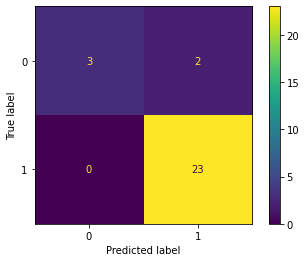

In [13]:
#Create logistic regression object, then a GridSearchCV to find best params
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()

g_scv = GridSearchCV(lr, parameters, scoring = 'accuracy', cv = 10)
logreg_cv = g_scv.fit(X_train, Y_train)

#Display best parameters
print("Tuned hyperparameters: (best parameters) ",logreg_cv.best_params_)
print("Logistic Regression best accuracy score (Training data): ", logreg_cv.best_score_)

#Calculate accuracy on test data
print("Logistic Regression accuracy (Test data): ", logreg_cv.score(X_test, Y_test))

#Create and plot confusion matrix for logistic regression
yhat=logreg_cv.predict(X_test)
#plot_confusion_matrix(Y_test, yhat)
ConfusionMatrixDisplay.from_predictions(Y_test, yhat)
plt.show()

Tuned hyperparameters: (best parameters)  {'C': 0.03162277660168379, 'gamma': 0.001, 'kernel': 'linear'}
Support Vector Machine best accuracy score (Training data): 0.890909090909091
Support Vector Machine accuracy (Test data):  0.9285714285714286


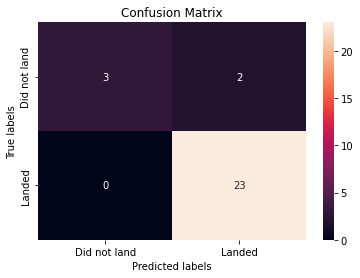

In [14]:
#Create support vector machine, then a GridSearchCV to find best params
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

g_scv = GridSearchCV(svm, parameters, scoring = 'accuracy', cv = 10)
svm_cv = g_scv.fit(X_train, Y_train)

#Display best parameters
print("Tuned hyperparameters: (best parameters) ", svm_cv.best_params_)
print("Support Vector Machine best accuracy score (Training data):", svm_cv.best_score_)

#Calculate accuracy on test data
print("Support Vector Machine accuracy (Test data): ", svm_cv.score(X_test, Y_test))

#Create and plot confusion matrix for SVM
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

Tuned hyperparameters: (best parameters)  {'criterion': 'gini', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
Decision Tree best accuracy score (Training data) : 0.9
Decision Tree accuracy (Test Data):  0.7857142857142857


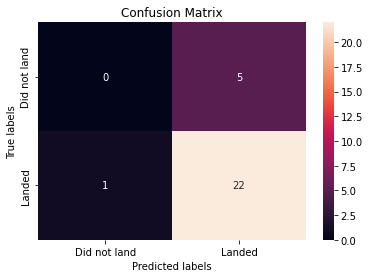

In [15]:
#Create decision tree classifier, then a GridSearchCV to find best params
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

g_scv = GridSearchCV(tree, parameters, scoring = 'accuracy', cv = 10)
tree_cv = g_scv.fit(X_train, Y_train)

#Display best parameters
print("Tuned hyperparameters: (best parameters) ", tree_cv.best_params_)
print("Decision Tree best accuracy score (Training data) :", tree_cv.best_score_)

#Calculate accuracy on test data
print("Decision Tree accuracy (Test Data): ", tree_cv.score(X_test, Y_test))

#Create and plot confusion matrix for decision tree
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

Tuned hyperparameters: (best parameters)  {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}
KNN best accuracy score (Training data) : 0.8727272727272727
KNN accuracy (Test data):  0.8928571428571429


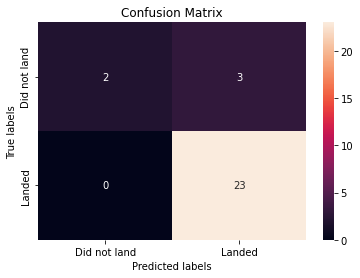

In [16]:
#Create KNN classifier, then a GridSearchCV to find best params
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

g_scv = GridSearchCV(KNN, parameters, scoring = 'accuracy', cv = 10)
knn_cv = g_scv.fit(X_train, Y_train)

#Display best parameters
print("Tuned hyperparameters: (best parameters) ", knn_cv.best_params_)
print("KNN best accuracy score (Training data) :", knn_cv.best_score_)

#Calculate accuracy on test data
print("KNN accuracy (Test data): ", knn_cv.score(X_test, Y_test))

#Create and plot confusion matrix for KNN
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)